<a href="https://colab.research.google.com/github/farism9q/T5-Bootcamp/blob/main/Week%20-%202%20/%20Weekly_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import what is needed from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من RTA_Dataset.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3421,8:30:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,5-10yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Other,Slight Injury
10858,12:30:00,Sunday,Unknown,Male,Junior high school,Employee,1-2yr,Automobile,Owner,5-10yrs,...,Reversing,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
9748,4:00:00,Friday,18-30,Male,Writing & reading,Employee,Below 1yr,Motorcycle,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
12063,16:30:00,Saturday,Under 18,Male,Junior high school,Employee,Above 10yr,Public (12 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
3653,19:15:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,NaN,Governmental,Below 1yr,...,Turnover,Pedestrian,Female,5,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury
4902,20:12:00,Tuesday,Under 18,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Turnover,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
9160,10:20:00,Thursday,Over 51,Male,Junior high school,Employee,Above 10yr,Motorcycle,Owner,Above 10yr,...,Going straight,Pedestrian,Female,Under 18,3,Self-employed,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury
6896,7:28:00,Wednesday,31-50,Male,NaN,Owner,NaN,Automobile,Owner,Unknown,...,Going straight,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
341,12:15:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Other,Owner,NaN,...,Going straight,Driver or rider,Female,18-30,3,NaN,NaN,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12187,15:40:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Long lorry,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [14]:
print(df["Sex_of_driver"].value_counts()) # One-hot enc
print("--------------------------------")
print(df["Educational_level"].value_counts())
print("--------------------------------")
print(df["Age_band_of_driver"].value_counts())
print("--------------------------------")
print(df["Driving_experience"].value_counts())
print("--------------------------------")
print(df["Vehicle_movement"].value_counts())



Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64
--------------------------------
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64
--------------------------------
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
--------------------------------
Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
--------------------------------
Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking             

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

Drop "Educational_level" and "Sex_of_driver" with "Unknown" values

In [170]:
unknown_edu = df[df["Educational_level"] == "Unknown"]
unknown_sex = df[df["Sex_of_driver"] == "Unknown"]
print(unknown_edu)
print(unknown_sex)
unknown_edu_indexes = df[df["Educational_level"] == "Unknown"].index
unknown_sex_indexes = df[df["Sex_of_driver"] == "Unknown"].index
unknown_age_indexes = df[df["Age_band_of_driver"] == "Unknown"].index
unknown_dr_ex_indexes = df[df["Driving_experience"] == "unknown"].index
print(len(unknown_edu))

unknown_indexes = [*unknown_edu_indexes, *unknown_sex_indexes, *unknown_age_indexes, *unknown_dr_ex_indexes]
df = df.drop(unknown_indexes)



unknown_edu = df[df["Educational_level"] == "Unknown"]
unknown_sex = df[df["Sex_of_driver"] == "Unknown"]
print("Should be empty: ", unknown_edu)
print("Should be empty: ", unknown_edu)

Empty DataFrame
Columns: [Time, Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Road_surface_conditions, Light_conditions, Weather_conditions, Type_of_collision, Number_of_vehicles_involved, Number_of_casualties, Vehicle_movement, Casualty_class, Sex_of_casualty, Age_band_of_casualty, Casualty_severity, Work_of_casuality, Fitness_of_casuality, Pedestrian_movement, Cause_of_accident, Accident_severity]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [Time, Day_of_week, Age_band_of_driver, Sex_of_driver, Educational_level, Vehicle_driver_relation, Driving_experience, Type_of_vehicle, Owner_of_vehicle, Service_year_of_vehicle, Defect_of_vehicle, Area_accident_occured, Lanes_or_Medians, Road_allignment, Types_of_Junction, Road_surface_type, Road

In [ ]:
df["Educational_level"].value_counts()

In [155]:
df["Sex_of_driver"].value_counts()

,count
Sex_of_driver,
Male,11342
Female,697


In [156]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10177
Serious Injury,1705
Fatal injury,157


In [160]:

df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
18-30,4172
31-50,3985
Over 51,1545
Under 18,808


In [157]:

df['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,7504
Elementary school,2126
High school,1099
Above high school,361
Writing & reading,175
Illiterate,45


In [165]:

df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,2859
2-5yr,2268
Above 10yr,1905
1-2yr,1506
Below 1yr,1138
No Licence,101


- Label enc for: "Accident_severity"
- One hot enc for: "Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience"


In [213]:
# np.array([ohe_gender, ohe_edu, ohe_age ,ohe_dr_ex])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [241]:
import numpy as np
# Label enc for: "Accident_severity"
# one hot enc for: "Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience"
X = df[["Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience"]]
y = df[["Accident_severity"]]
print(X.shape)
print(y.shape)

ohe_gender = ["Male", "Female"]
ohe_edu = ["Junior high school", "Elementary school", "High school", "Above high school", "Writing & reading", "Illiterate"]
ohe_age = ["18-30", "31-50", "Over 51", "Under 18"]
ohe_dr_ex = ["5-10yr", "2-5yr" ,"Above 10yr", "1-2yr", "Below 1yr", "No Licence"]

# Label
le_accident_severity = ["Slight Injury", "Serious Injury", "Fatal injury"]

ohe = OneHotEncoder()#.fit(, dtype=object))

le = LabelEncoder()



cat_pre = ColumnTransformer(
    transformers=[
        ("one_hot_enc", ohe, ["Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience"]),
    ]
)

# cat_pre_label = ColumnTransformer(
#     transformers=[
#         ("label_enc", le, ["Accident_severity"])
#     ]
# )

cat_pre_label = le.fit(le_accident_severity)

# cat_pipeline = make_pipeline(cat_pre)
# num_pipeline = make_pipeline(StandardScaler())

# preprocessing_pipe = ColumnTransformer([
#      ('cat', cat_pipeline, ["Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience"]),
# ])





(10482, 4)
(10482, 1)


In [35]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


**Men are the high with fatal injury compared to women**

In [125]:
df_fatal_inj_male = df[df["Accident_severity"] == "Fatal injury"][df["Sex_of_driver"] == "Male"]
df_fatal_inj_female = df[df["Accident_severity"] == "Fatal injury"][df["Sex_of_driver"] == "Female"]

print(len(df_fatal_inj_male))
print(len(df_fatal_inj_female))

152
5


<ipython-input-125-e22f7b675221>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fatal_inj_male = df[df["Accident_severity"] == "Fatal injury"][df["Sex_of_driver"] == "Male"]
<ipython-input-125-e22f7b675221>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fatal_inj_female = df[df["Accident_severity"] == "Fatal injury"][df["Sex_of_driver"] == "Female"]


In [111]:
dfff = df[["Accident_severity", "Age_band_of_driver", "Sex_of_driver", "Driving_experience"]].groupby(["Accident_severity", "Age_band_of_driver", "Sex_of_driver", "Driving_experience"]).sum()


Empty DataFrame
Columns: []
Index: [(Fatal injury, 18-30, Female, 5-10yr), (Fatal injury, 18-30, Male, 1-2yr), (Fatal injury, 18-30, Male, 2-5yr), (Fatal injury, 18-30, Male, 5-10yr), (Fatal injury, 18-30, Male, Above 10yr), (Fatal injury, 18-30, Male, Below 1yr), (Fatal injury, 31-50, Male, 1-2yr), (Fatal injury, 31-50, Male, 2-5yr), (Fatal injury, 31-50, Male, 5-10yr), (Fatal injury, 31-50, Male, Above 10yr), (Fatal injury, 31-50, Male, Below 1yr), (Fatal injury, 31-50, Unknown, Above 10yr), (Fatal injury, Over 51, Male, 1-2yr), (Fatal injury, Over 51, Male, 2-5yr), (Fatal injury, Over 51, Male, 5-10yr), (Fatal injury, Over 51, Male, Above 10yr), (Fatal injury, Over 51, Male, Below 1yr), (Fatal injury, Over 51, Male, unknown), (Fatal injury, Under 18, Male, 1-2yr), (Fatal injury, Under 18, Male, 2-5yr), (Fatal injury, Under 18, Male, 5-10yr), (Fatal injury, Under 18, Male, Above 10yr), (Fatal injury, Under 18, Male, Below 1yr), (Fatal injury, Unknown, Female, 1-2yr), (Fatal injury, Unknown, Female, 2-5yr), (Fatal injury, Unknown, Male, 1-2yr), (Fatal injury, Unknown, Male, 5-10yr), (Serious Injury, 18-30, Female, 1-2yr), (Serious Injury, 18-30, Female, 2-5yr), (Serious Injury, 18-30, Female, 5-10yr), (Serious Injury, 18-30, Female, Above 10yr), (Serious Injury, 18-30, Female, Below 1yr), (Serious Injury, 18-30, Male, 1-2yr), (Serious Injury, 18-30, Male, 2-5yr), (Serious Injury, 18-30, Male, 5-10yr), (Serious Injury, 18-30, Male, Above 10yr), (Serious Injury, 18-30, Male, Below 1yr), (Serious Injury, 18-30, Male, No Licence), (Serious Injury, 18-30, Male, unknown), (Serious Injury, 18-30, Unknown, 2-5yr), (Serious Injury, 18-30, Unknown, Below 1yr), (Serious Injury, 31-50, Female, 1-2yr), (Serious Injury, 31-50, Female, 2-5yr), (Serious Injury, 31-50, Female, 5-10yr), (Serious Injury, 31-50, Female, Above 10yr), (Serious Injury, 31-50, Male, 1-2yr), (Serious Injury, 31-50, Male, 2-5yr), (Serious Injury, 31-50, Male, 5-10yr), (Serious Injury, 31-50, Male, Above 10yr), (Serious Injury, 31-50, Male, Below 1yr), (Serious Injury, 31-50, Male, No Licence), (Serious Injury, 31-50, Male, unknown), (Serious Injury, 31-50, Unknown, 1-2yr), (Serious Injury, 31-50, Unknown, 2-5yr), (Serious Injury, 31-50, Unknown, 5-10yr), (Serious Injury, 31-50, Unknown, No Licence), (Serious Injury, Over 51, Female, 1-2yr), (Serious Injury, Over 51, Female, 5-10yr), (Serious Injury, Over 51, Female, Above 10yr), (Serious Injury, Over 51, Male, 1-2yr), (Serious Injury, Over 51, Male, 2-5yr), (Serious Injury, Over 51, Male, 5-10yr), (Serious Injury, Over 51, Male, Above 10yr), (Serious Injury, Over 51, Male, Below 1yr), (Serious Injury, Over 51, Male, No Licence), (Serious Injury, Over 51, Male, unknown), (Serious Injury, Over 51, Unknown, 5-10yr), (Serious Injury, Over 51, Unknown, Above 10yr), (Serious Injury, Over 51, Unknown, Below 1yr), (Serious Injury, Under 18, Female, 2-5yr), (Serious Injury, Under 18, Female, 5-10yr), (Serious Injury, Under 18, Female, Above 10yr), (Serious Injury, Under 18, Male, 1-2yr), (Serious Injury, Under 18, Male, 2-5yr), (Serious Injury, Under 18, Male, 5-10yr), (Serious Injury, Under 18, Male, Above 10yr), (Serious Injury, Under 18, Male, Below 1yr), (Serious Injury, Under 18, Male, No Licence), (Serious Injury, Under 18, Male, unknown), (Serious Injury, Unknown, Female, 1-2yr), (Serious Injury, Unknown, Female, 2-5yr), (Serious Injury, Unknown, Female, 5-10yr), (Serious Injury, Unknown, Female, Above 10yr), (Serious Injury, Unknown, Female, Below 1yr), (Serious Injury, Unknown, Male, 1-2yr), (Serious Injury, Unknown, Male, 2-5yr), (Serious Injury, Unknown, Male, 5-10yr), (Serious Injury, Unknown, Male, Above 10yr), (Serious Injury, Unknown, Male, Below 1yr), (Serious Injury, Unknown, Male, No Licence), (Slight Injury, 18-30, Female, 1-2yr), (Slight Injury, 18-30, Female, 2-5yr), (Slight Injury, 18-30, Female, 5-10yr), (Slight Injury, 18-30, Female, Above 10yr), (Slight Injury, 18-30, Female, Below 1yr), (Slight Injury

In [33]:
df[df['Driving_experience'].isnull()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
24,18:36:00,Wednesday,18-30,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,Improper parking,Slight Injury
28,12:25:00,Tuesday,Over 51,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
38,20:30:00,Friday,Over 51,Male,NaN,Unknown,NaN,NaN,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
41,21:50:00,Sunday,31-50,Male,NaN,Unknown,NaN,NaN,Owner,5-10yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12249,16:55:00,Friday,31-50,Female,NaN,NaN,NaN,Automobile,Owner,NaN,...,Going straight,Pedestrian,Female,18-30,2,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
12270,18:35:00,Saturday,31-50,Male,NaN,NaN,NaN,Automobile,Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Fatal injury
12285,17:50:00,Saturday,31-50,Male,NaN,NaN,NaN,Stationwagen,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
12291,16:26:00,Tuesday,Over 51,Male,NaN,NaN,NaN,Other,Owner,5-10yrs,...,Other,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury


In [34]:
df["Educational_level"].isnull().sum()

741

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: xlabel='Count', ylabel='Educational_level'>

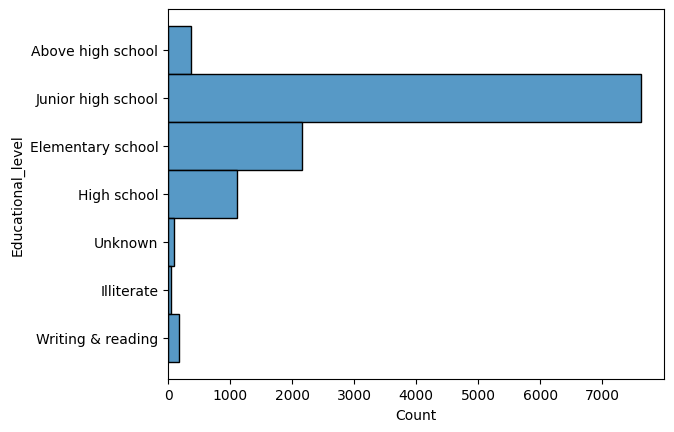

In [27]:
# "Sex_of_driver", "Educational_level", "Age_band_of_driver", "Driving_experience",
sns.histplot(df, y="Educational_level")

<Axes: xlabel='Count', ylabel='Age_band_of_driver'>

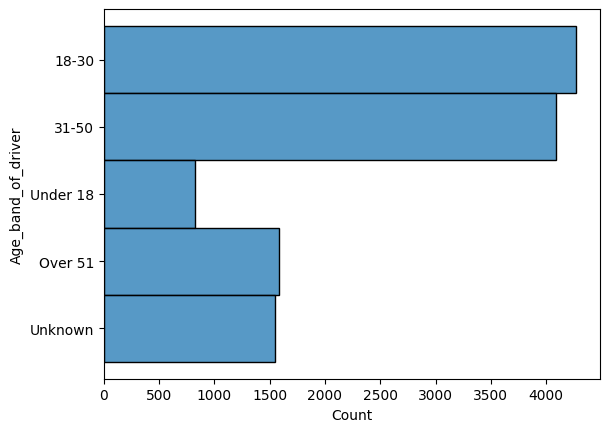

In [28]:
sns.histplot(df, y="Age_band_of_driver")


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


(8385, 1)

In [242]:
# We apply the pipline only on X, the features.
X_train_preprocessed = cat_pre.fit_transform(X_train)
X_test_preprocessed = cat_pre.transform(X_test)

y_train_preprocessed = cat_pre_label.fit_transform(y_train)
y_test_preprocessed = cat_pre_label.transform(y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [175]:
X_train.shape

(8385, 4)

In [176]:
y_train.shape

(8385, 1)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_preprocessed, y_train_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Decision Tree Classifier

In [246]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_preprocessed, y_train_preprocessed)

DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [247]:
from sklearn.svm import LinearSVR
svm = LinearSVR()
svm.fit(X_train_preprocessed, y_train_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

#### K-Neighbors Classifier

In [248]:
from sklearn.svm import LinearSVR
svm = LinearSVR()
svm.fit(X_train_preprocessed, y_train_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [250]:
y_train.value_counts()

,count
Accident_severity,
Slight Injury,7041
Serious Injury,1232
Fatal injury,112


In [249]:
from sklearn.metrics import confusion_matrix

y_pred_dt = dt.predict(X_train_preprocessed)

cm = confusion_matrix(y_train_preprocessed, y_pred_dt)

cm

array([[   1,    0,  111],
       [   0,   32, 1200],
       [   0,   16, 7025]])

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: